In [1]:
"""# Sentiment and Emotion Analysis using NLP

This project analyzes text data to classify sentiment and emotions using Natural Language Processing.

## Features
- Sentiment classification
- Emotion detection
- Visualization of trends
- Business insights

## Tools Used
- Python
- Pandas
- NLTK
- TextBlob
- Matplotlib
- Seaborn

## How to Run
1. Install requirements
2. Run sentiment_analysis.ipynb"""


'# Sentiment and Emotion Analysis using NLP\n\nThis project analyzes text data to classify sentiment and emotions using Natural Language Processing.\n\n## Features\n- Sentiment classification\n- Emotion detection\n- Visualization of trends\n- Business insights\n\n## Tools Used\n- Python\n- Pandas\n- NLTK\n- TextBlob\n- Matplotlib\n- Seaborn\n\n## How to Run\n1. Install requirements\n2. Run sentiment_analysis.ipynb'

In [2]:
!pip install pandas numpy matplotlib seaborn nltk textblob wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from wordcloud import WordCloud


In [4]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sayle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data = {
    "review": [
        "This product is amazing and works perfectly",
        "Worst purchase ever, totally disappointed",
        "It is okay, nothing special",
        "I love this phone, excellent quality",
        "The service was terrible and slow",
        "Average experience, not bad not good",
        "Fantastic design and great performance",
        "Horrible packaging and broken item"
    ]
}

df = pd.DataFrame(data)
df


,review
0,This product is amazing and works perfectly
1,"Worst purchase ever, totally disappointed"
2,"It is okay, nothing special"
3,"I love this phone, excellent quality"
4,The service was terrible and slow
5,"Average experience, not bad not good"
6,Fantastic design and great performance
7,Horrible packaging and broken item


In [6]:
"""STEP 5 — Sentiment Analysis"""
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["review"].apply(get_sentiment)
df


,review,Sentiment
0,This product is amazing and works perfectly,Positive
1,"Worst purchase ever, totally disappointed",Negative
2,"It is okay, nothing special",Positive
3,"I love this phone, excellent quality",Positive
4,The service was terrible and slow,Negative
5,"Average experience, not bad not good",Negative
6,Fantastic design and great performance,Positive
7,Horrible packaging and broken item,Negative


In [7]:
"""STEP 6 — Emotion Detection"""
emotion_lexicon = {
    "happy": "Joy",
    "love": "Joy",
    "amazing": "Joy",
    "fantastic": "Joy",
    "excellent": "Joy",
    "worst": "Anger",
    "terrible": "Anger",
    "horrible": "Anger",
    "disappointed": "Sadness",
    "broken": "Sadness"
}

def detect_emotion(text):
    text = text.lower()
    for word in text.split():
        if word in emotion_lexicon:
            return emotion_lexicon[word]
    return "Neutral"

df["Emotion"] = df["review"].apply(detect_emotion)
df


,review,Sentiment,Emotion
0,This product is amazing and works perfectly,Positive,Joy
1,"Worst purchase ever, totally disappointed",Negative,Anger
2,"It is okay, nothing special",Positive,Neutral
3,"I love this phone, excellent quality",Positive,Joy
4,The service was terrible and slow,Negative,Anger
5,"Average experience, not bad not good",Negative,Neutral
6,Fantastic design and great performance,Positive,Joy
7,Horrible packaging and broken item,Negative,Anger


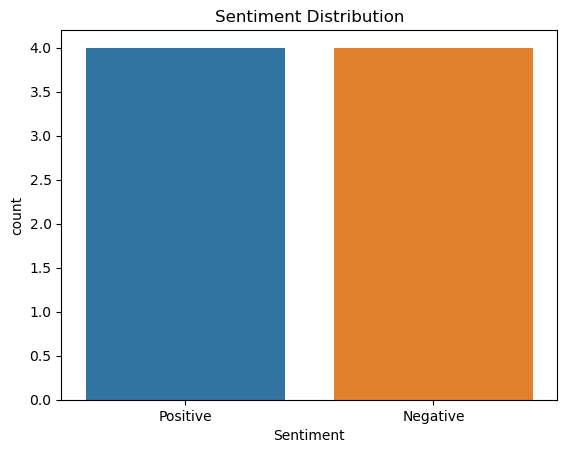

In [8]:
'''STEP 7 — Visualization of Sentiment Trends'''
plt.figure()
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()


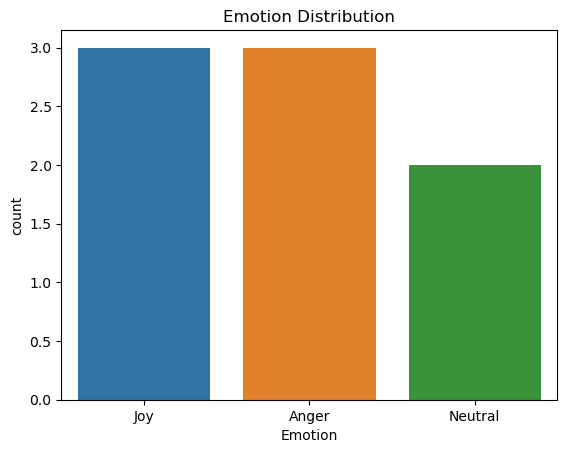

In [9]:
'''STEP 8 — Emotion Distribution'''
plt.figure()
sns.countplot(x="Emotion", data=df)
plt.title("Emotion Distribution")
plt.show()


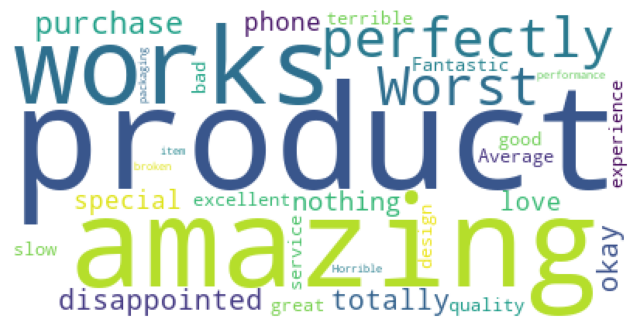

In [10]:
"""STEP 9 — WordCloud """
text = " ".join(df["review"])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [11]:
'''### Business Insights

1. Majority of users show positive sentiment towards the product.
2. Negative emotions are linked to service and packaging issues.
3. Joy emotions indicate good design and performance satisfaction.
4. Marketing teams can highlight positive features.
5. Product teams should improve delivery and service quality.'''


'### Business Insights\n\n1. Majority of users show positive sentiment towards the product.\n2. Negative emotions are linked to service and packaging issues.\n3. Joy emotions indicate good design and performance satisfaction.\n4. Marketing teams can highlight positive features.\n5. Product teams should improve delivery and service quality.'

In [12]:
df.to_csv("sentiment_results.csv", index=False)
